In [50]:
#IMPORTING ALL THE NECESSARY PACKAGES.
import matplotlib.pyplot as plt                                                 #Importing matplotlib to plot and analyse data.
import pandas as pd
import numpy as np
import plotly.express as px                                                  
from prophet import Prophet   

In [51]:
df=pd.read_csv("E:\HAGLdataset (4).csv")

In [52]:
# Convert the 'date' column to a datetime data type
df['date']=pd.to_datetime(df.date,format='%m/%d/%Y')
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['date'].values))
df.head()

,date,price,Open,High,Low,Vol.,Change %
2015-09-07,2015-09-07,14600,14600,14700,14500,553.02K,-0.68%
2015-09-08,2015-09-08,14800,14500,14800,14400,969.66K,1.37%
2015-09-09,2015-09-09,14800,14900,15000,14700,809.43K,0.00%
2015-09-10,2015-09-10,14800,14600,14800,14600,624.23K,0.00%
2015-09-11,2015-09-11,14800,14700,14900,14700,654.53K,0.00%


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1812 entries, 2015-09-07 to 2022-11-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1812 non-null   datetime64[ns]
 1   price     1812 non-null   int64         
 2   Open      1812 non-null   int64         
 3   High      1812 non-null   int64         
 4   Low       1812 non-null   int64         
 5   Vol.      1812 non-null   object        
 6   Change %  1812 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 113.2+ KB


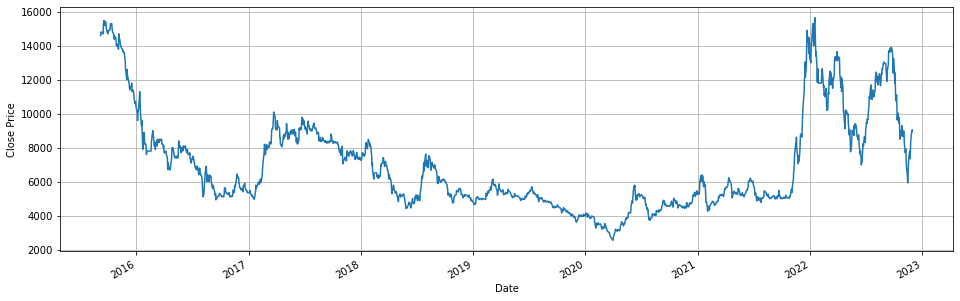

In [54]:
#Visualise the past 5 year's price of BTC
plt.xlabel('Date')
plt.ylabel('Close Price')
df['price'].plot(figsize=(16,5))
plt.grid()

In [55]:
df[['ds','y']] = df[['date','price']]                       #preparing expected column names
df

,date,price,Open,High,Low,Vol.,Change %,ds,y
2015-09-07,2015-09-07,14600,14600,14700,14500,553.02K,-0.68%,2015-09-07,14600
2015-09-08,2015-09-08,14800,14500,14800,14400,969.66K,1.37%,2015-09-08,14800
2015-09-09,2015-09-09,14800,14900,15000,14700,809.43K,0.00%,2015-09-09,14800
2015-09-10,2015-09-10,14800,14600,14800,14600,624.23K,0.00%,2015-09-10,14800
2015-09-11,2015-09-11,14800,14700,14900,14700,654.53K,0.00%,2015-09-11,14800
...,...,...,...,...,...,...,...,...,...
2022-11-24,2022-11-24,7860,7300,7860,7150,10.88M,6.94%,2022-11-24,7860
2022-11-25,2022-11-25,8410,8400,8410,8300,20.45M,7.00%,2022-11-25,8410
2022-11-28,2022-11-28,8960,8940,8990,8660,18.24M,6.54%,2022-11-28,8960
2022-11-29,2022-11-29,8920,8710,9150,8510,23.40M,-0.45%,2022-11-29,8920


In [56]:
#Training and Evaluating our Model
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)

In [57]:
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (1450, 9)
testing data size : (362, 9)


In [58]:
from sklearn.metrics import mean_absolute_error
model = Prophet(daily_seasonality=True)
model.fit(train_data)
prediction = model.predict(pd.DataFrame({'ds':test_data['ds']}))
y_actual = test_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

21:49:01 - cmdstanpy - INFO - Chain [1] start processing
21:49:01 - cmdstanpy - INFO - Chain [1] done processing


1004.3011049723757

In [59]:
#import the facebbook prophet plotting libraries
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt
#Visualize the predicted and the actual values.
plt.figure(figsize=(16,5))
plot_plotly(model,prediction)

<Figure size 1152x360 with 0 Axes>

In [60]:
#Price action Prediction
model = Prophet()                                                               #creating an instant of prophet class in model.
model.fit(df)#fitting data_frame to the model.
future = model.make_future_dataframe(15)                                       #making future dataframe for 365 days and storing the date values in future.
forecast = model.predict(future) 

21:49:02 - cmdstanpy - INFO - Chain [1] start processing
21:49:02 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
#plot the data
plot_plotly(model,forecast)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
#Test data
mae = mean_absolute_error(y_actual, y_predicted)
mape = mean_absolute_percentage_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_predicted)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 1004.30
MAPE: 14.21%
MSE: 1909738.36
RMSE: 1381.93
R2: 0.77
